Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [389]:

df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/mly4935.csv", skiprows=19)
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,
1,1996,10,9.7,,,12.5,7.0,,,,,
2,1996,11,5.0,,,7.6,2.5,,,,,


In [390]:
df["day"]=1
df.head(3)

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun,day
0,1996,8,13.4,20.4,7.3,16.6,10.3,109.4,5.3,8.3,34,,1
1,1996,10,9.7,,,12.5,7.0,,,,,,1
2,1996,11,5.0,,,7.6,2.5,,,,,,1


In [391]:
df['date']=pd.to_datetime(df[['year', 'month', 'day']])
df['date']

0     1996-08-01
1     1996-10-01
2     1996-11-01
3     1996-12-01
4     1997-01-01
         ...    
344   2025-05-01
345   2025-06-01
346   2025-07-01
347   2025-08-01
348   2025-09-01
Name: date, Length: 349, dtype: datetime64[ns]

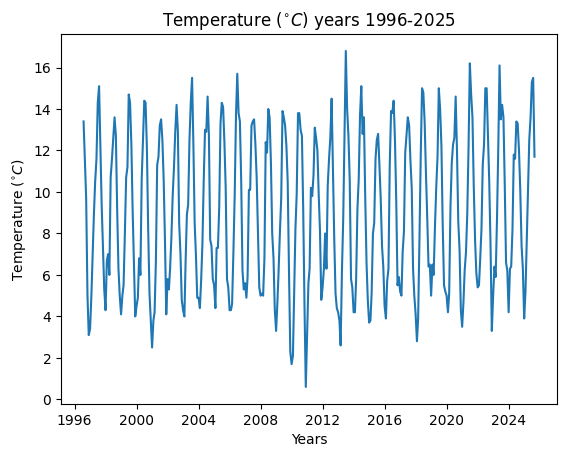

In [392]:


# plot the mean temperature from the dataset from 1996 to 2025

fig, ax = plt.subplots()

sns.lineplot(data=df, x="date", y="meant", ax=ax)

# Use raw strings (r"...") to prevent invalid escape warnings
ax.set_ylabel(r'Temperature ($^{\circ}C$)')
ax.set_xlabel('Years')
ax.set_title(r'Temperature ($^{\circ}C$) years 1996-2025')

plt.show()

Resampled 10624 daily points from 349 total data points.


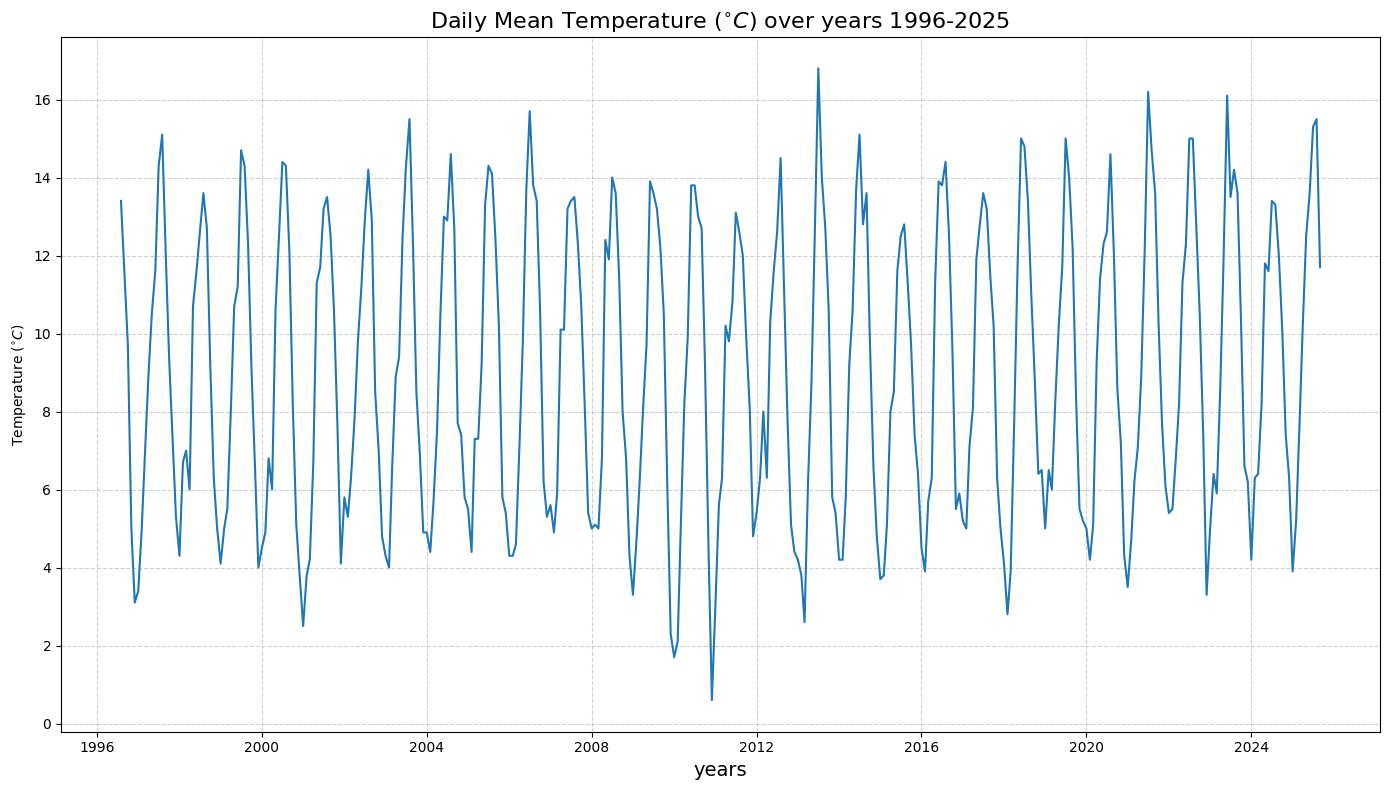

In [393]:
# daily mean temperature from 1996 to 2025

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# define the function to filter the date range
df_indexed = df.set_index('date').loc['1996-01-01':'2025-12-31']

# Resample to daily mean temperature
mean_daily_temp = df_indexed['meant'].resample('D').mean()

print(f"Resampled {mean_daily_temp.shape[0]} daily points from {df.shape[0]} total data points.")

# Plot daily mean temperature
plt.figure(figsize=(14, 8))
sns.lineplot(x=mean_daily_temp.index, y=mean_daily_temp.values)

# Label and style the plot
plt.title(r'Daily Mean Temperature ($^{\circ}C$) over years 1996-2025', fontsize=16)
plt.xlabel('years', fontsize=14)
plt.ylabel(r'Temperature ($^{\circ}C$)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

There are 350 monthly averages from 349 original data points


C:\Users\finia\AppData\Local\Temp\ipykernel_9572\1259848589.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mean_monthly_temp = df_indexed['meant'].resample('M').mean()


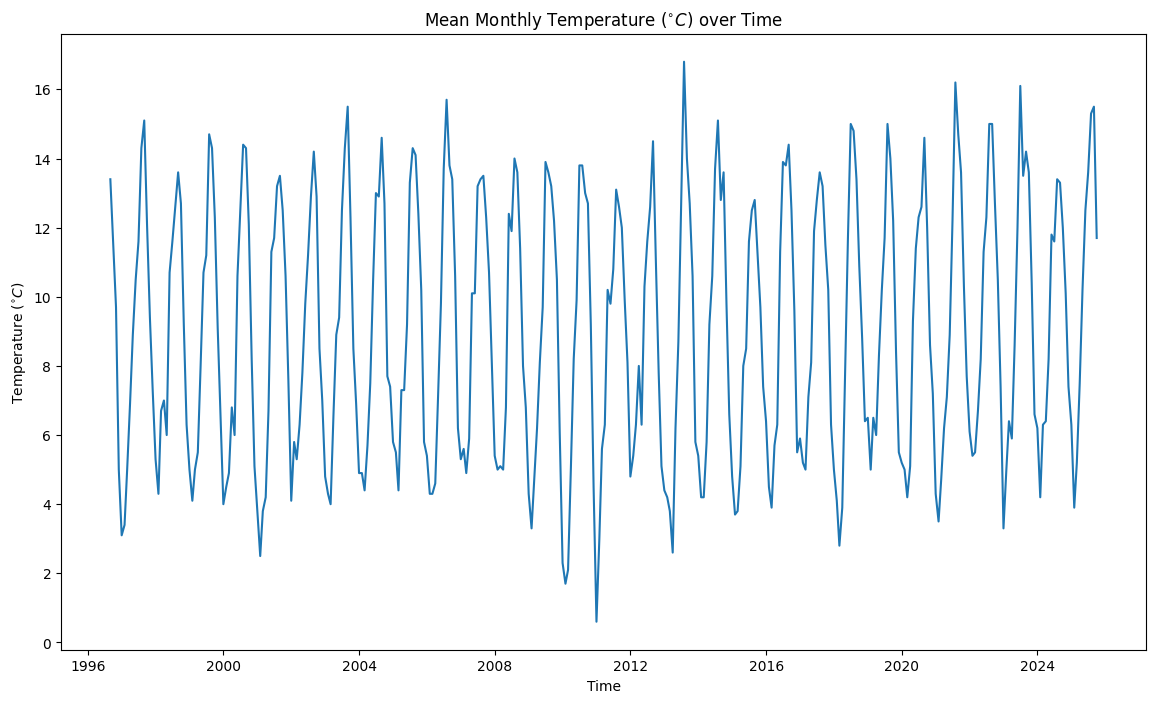

In [394]:
# Calculate mean temperature per month

mean_monthly_temp = df_indexed['meant'].resample('M').mean()

print(f"There are {mean_monthly_temp.shape[0]} monthly averages from {df.shape[0]} original data points")

# Plot
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x=mean_monthly_temp.index, y=mean_monthly_temp.values, ax=ax)

# Label the plot
ax.set_ylabel(r'Temperature ($^{\circ}C$)')
ax.set_xlabel('Time')
ax.set_title(r'Mean Monthly Temperature ($^{\circ}C$) over Time')

plt.show()

In [395]:
# calculate the wind speed over 24 hours
# detering misssing values
df_indexed['wdsp'].isna().sum()


np.int64(0)

In [396]:
# count the unique values in the wind speed column
df_indexed['wdsp'].value_counts()

wdsp
8.8     18
8.3     13
8.6     13
9.4     13
9.1     12
        ..
6.8      1
7.2      1
13.6     1
13.5     1
11.7     1
Name: count, Length: 68, dtype: int64

In [397]:
# count how many values start with a space
df_indexed['wdsp'].str.startswith(' ').sum()

np.int64(2)

In [398]:
# replace values that start with a space with NaN
df_indexed['wdsp'] = np.where(df_indexed['wdsp'].str.startswith(' '), np.nan, df_indexed['wdsp'])

In [399]:
# check how many missing values are there now
df_indexed['wdsp'].isna().sum()

np.int64(2)

In [400]:
# fill missing values with backfill method
df_indexed['wdsp'] = df_indexed['wdsp'].bfill()

In [401]:
# check how many missing values are there now
df_indexed['wdsp'].isna().sum()

np.int64(0)

In [402]:
# convert wind speed to numeric
df_indexed['wdsp'] = pd.to_numeric(df_indexed['wdsp'], errors='coerce')
mean_quarterly_windspeed = df_indexed['wdsp'].resample('D').mean() # resampling per day

There are 10624 resampled daily points from 349 data points


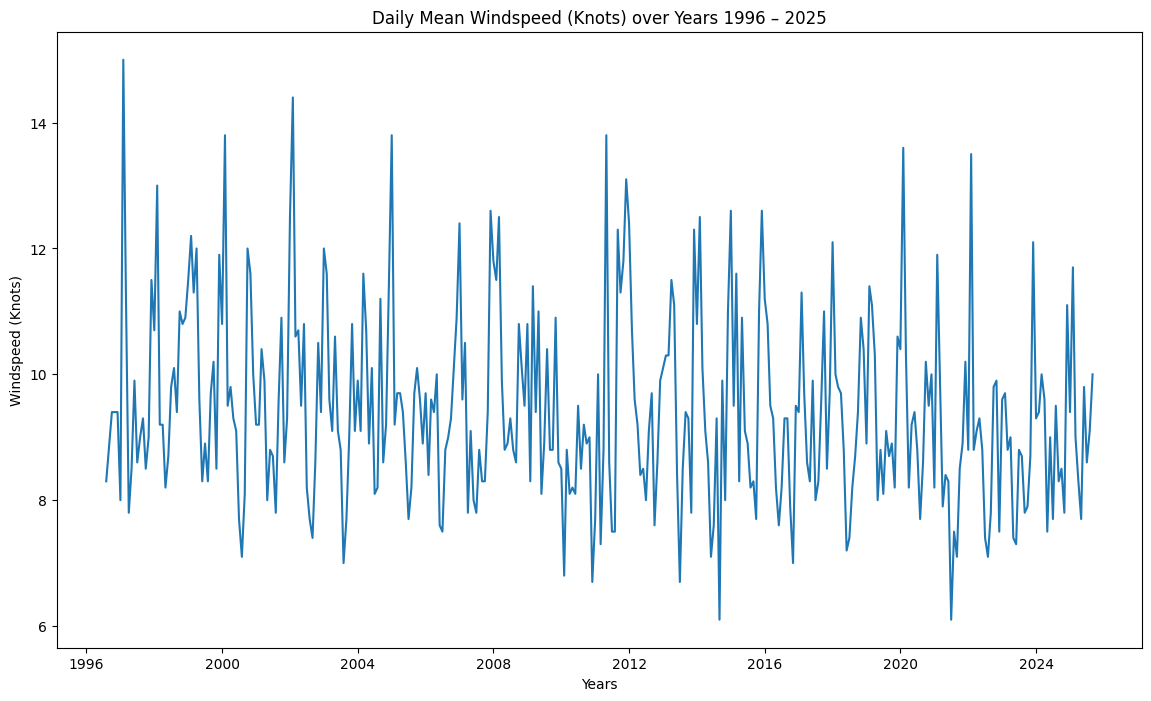

In [403]:
# Calculate mean wind speed per day
mean_daily_windspeed = df_indexed['wdsp'].resample('D').mean()  # 'D' = daily frequency
print(f"There are {mean_daily_windspeed.shape[0]} resampled daily points from {df_indexed.shape[0]} data points")

# Plot mean daily windspeed
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(data=mean_daily_windspeed)
ax.set_ylabel('Windspeed (Knots)')
ax.set_xlabel('Years')
ax.set_title('Daily Mean Windspeed (Knots) over Years 1996 – 2025')
plt.show()
